Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1 - Data Preprocessing

Reading the datset

In [2]:
dataset = pd.read_csv("insurance.csv")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Checking the type of dataset

In [3]:
type(dataset)

pandas.core.frame.DataFrame

Seeing the datatype of each column

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Statistical summary

In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data Visualization

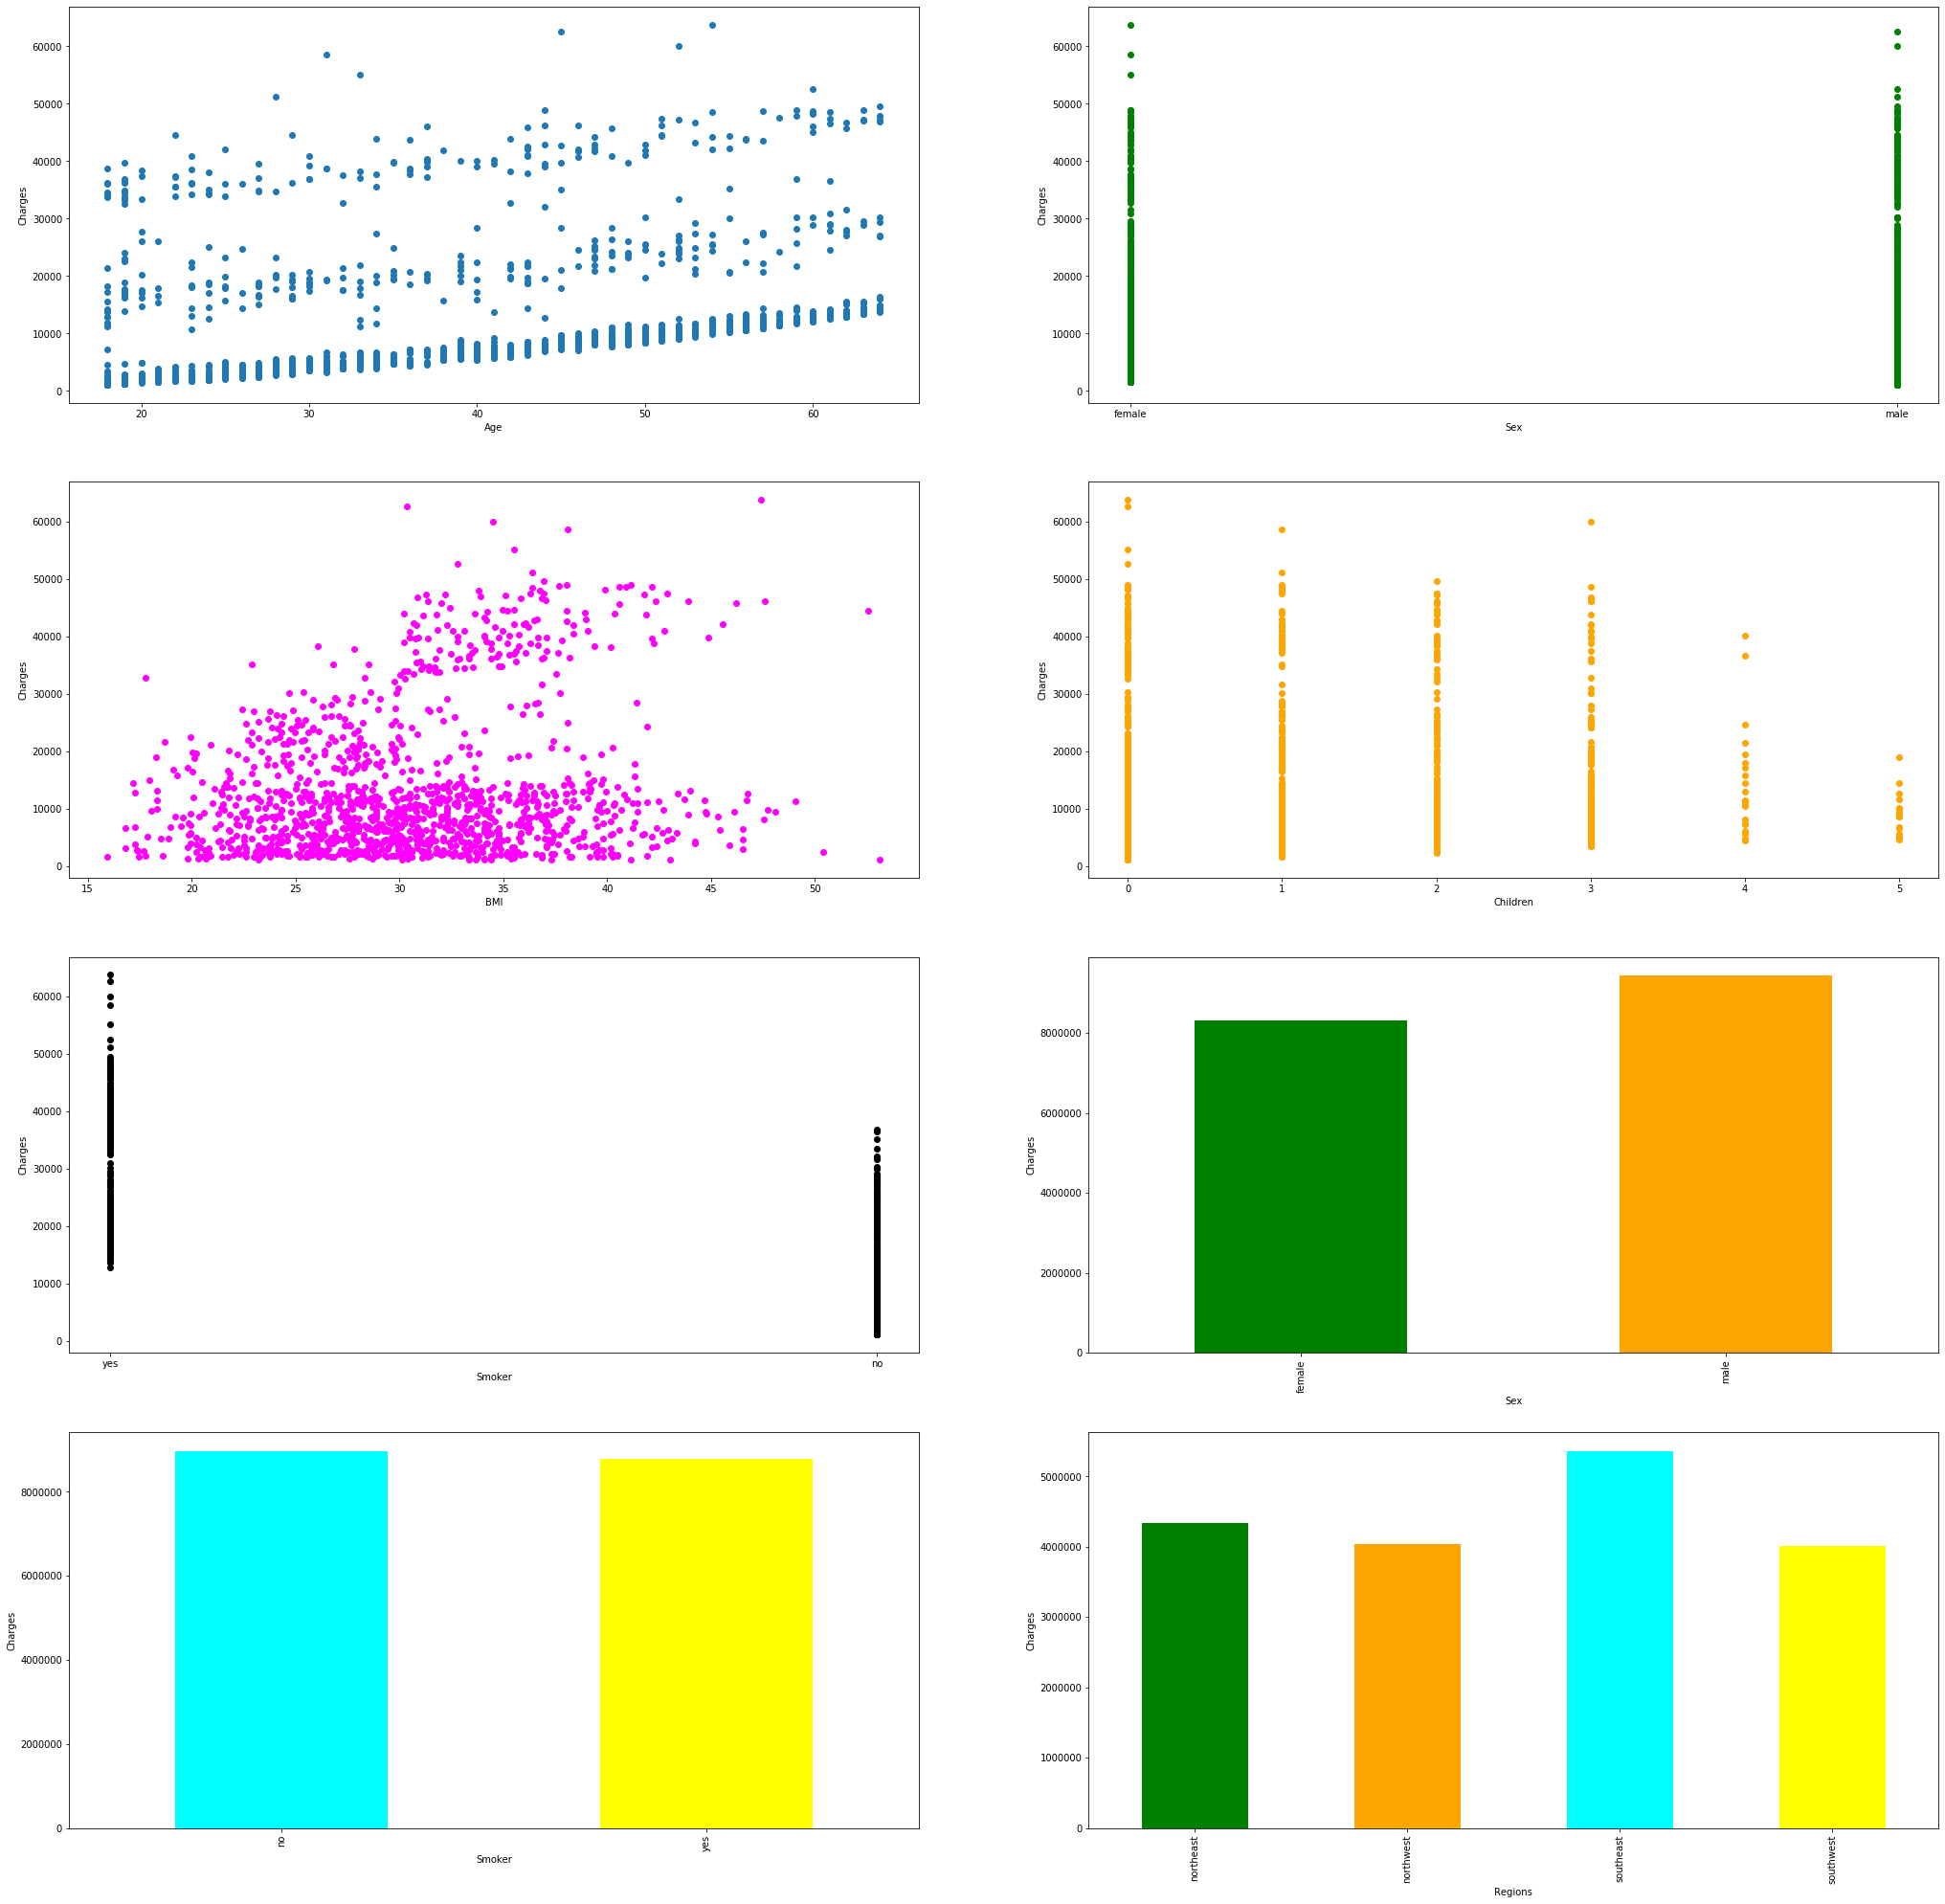

In [6]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(35,35))
ax[0][0].scatter(dataset['age'], dataset['charges'])
ax[0][0].set_xlabel('Age')
ax[0][0].set_ylabel('Charges')

ax[0][1].scatter(dataset['sex'], dataset['charges'], color='green')
ax[0][1].set_xlabel('Sex')
ax[0][1].set_ylabel('Charges')

ax[1][0].scatter(dataset['bmi'], dataset['charges'], color='magenta')
ax[1][0].set_xlabel('BMI')
ax[1][0].set_ylabel('Charges')

ax[1][1].scatter(dataset['children'], dataset['charges'], color='orange')
ax[1][1].set_xlabel('Children')
ax[1][1].set_ylabel('Charges')

ax[2][0].scatter(dataset['smoker'], dataset['charges'], color='black')
ax[2][0].set_xlabel('Smoker')
ax[2][0].set_ylabel('Charges')

plt.subplot(4,2,6)
dataset.groupby(['sex'])['charges'].sum().plot.bar(color=['green', 'orange'])
plt.xlabel('Sex')
plt.ylabel('Charges')

plt.subplot(4,2,7)
dataset.groupby(['smoker'])['charges'].sum().plot.bar(color=['cyan', 'yellow'])
plt.xlabel('Smoker')
plt.ylabel('Charges')

plt.subplot(4,2,8)
dataset.groupby(['region'])['charges'].sum().plot.bar(color=['green', 'orange', 'cyan', 'yellow'])
plt.xlabel('Regions')
plt.ylabel('Charges')

plt.show()

Checking if there are any missing values present in the dataset 

In [7]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

As we can see that there are no null values or missing values present in our dataset hence, there is no need to handle the missing values

In the given dataset we can see that there are categorical data present so, we need to encode them

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lb = LabelEncoder()
dataset['sex'] = lb.fit_transform(dataset['sex'])
dataset['smoker'] = lb.fit_transform(dataset['smoker'])
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


checking correlation of columns in the given dataset

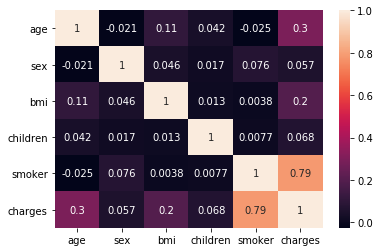

In [10]:
import seaborn as sns
sns.heatmap(dataset.corr(), annot=True)

from the above Heatmap we can see that columns of sex and children are less correlated with column of charges. Hence, we should not take as independent columns. While if we see the columns of age, bmi, and smoker, they are highly correlated with the column of charges.Also,region will have effect on charges as charges varies from region to region. Therefore, we can consider columns of age,bmi,smoker and region as independent columns 

Splitting data into independent and dependent variables

In [11]:
x = dataset.iloc[:,[0,2,4,5]].values
x

array([[19, 27.9, 1, 'southwest'],
       [18, 33.77, 0, 'southeast'],
       [28, 33.0, 0, 'southeast'],
       ...,
       [18, 36.85, 0, 'southeast'],
       [21, 25.8, 0, 'southwest'],
       [61, 29.07, 1, 'northwest']], dtype=object)

In [12]:
y = dataset.iloc[:,-1].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

Encoding of Region column

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [(3)])], remainder='passthrough')
x = ct.fit_transform(x)
x

array([[0.0, 0.0, 0.0, ..., 19, 27.9, 1],
       [0.0, 0.0, 1.0, ..., 18, 33.77, 0],
       [0.0, 0.0, 1.0, ..., 28, 33.0, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 18, 36.85, 0],
       [0.0, 0.0, 0.0, ..., 21, 25.8, 0],
       [0.0, 1.0, 0.0, ..., 61, 29.07, 1]], dtype=object)

Avoiding Dummy Variable Trap

In [14]:
x = x[:,1:]
x

array([[0.0, 0.0, 1.0, 19, 27.9, 1],
       [0.0, 1.0, 0.0, 18, 33.77, 0],
       [0.0, 1.0, 0.0, 28, 33.0, 0],
       ...,
       [0.0, 1.0, 0.0, 18, 36.85, 0],
       [0.0, 0.0, 1.0, 21, 25.8, 0],
       [1.0, 0.0, 0.0, 61, 29.07, 1]], dtype=object)

Splitting Dataset into Train and Test

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Part 2 -  Model Building

In [25]:
x_train

array([[-0.55791981, -0.6155209 ,  1.70862925, -0.14853305,  0.54530479,
         1.97125461],
       [-0.55791981,  1.6246402 , -0.58526447, -1.49780784,  0.59867181,
        -0.50729114],
       [-0.55791981, -0.6155209 , -0.58526447, -1.14273553,  0.96092064,
         1.97125461],
       ...,
       [-0.55791981,  1.6246402 , -0.58526447,  0.06451033, -0.91339361,
        -0.50729114],
       [ 1.79237229, -0.6155209 , -0.58526447, -1.42679338,  0.77656186,
        -0.50729114],
       [-0.55791981, -0.6155209 ,  1.70862925, -0.4325909 , -1.97749955,
        -0.50729114]])

In [26]:
y_train

array([40182.246 ,  1137.4697, 38511.6283, ...,  5415.6612,  1646.4297,
        4766.022 ])

In [27]:
x_test

array([[-0.55791981, -0.6155209 ,  1.70862925,  0.91668389, -0.08539629,
        -0.50729114],
       [-0.55791981,  1.6246402 , -0.58526447,  0.56161157, -0.21962242,
        -0.50729114],
       [ 1.79237229, -0.6155209 , -0.58526447,  0.63262604,  1.59081313,
         1.97125461],
       ...,
       [-0.55791981, -0.6155209 , -0.58526447,  1.2717562 ,  1.54472343,
        -0.50729114],
       [-0.55791981,  1.6246402 , -0.58526447, -0.64563429,  1.34581001,
         1.97125461],
       [-0.55791981, -0.6155209 , -0.58526447,  0.49059711, -0.95948331,
        -0.50729114]])

In [28]:
y_test

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
yp=lr.predict(x_test)
yp

array([11292.79732547,  9487.94403773, 37845.83643247, 16784.71261612,
        7362.65784046,  4387.35915763,  1961.95122534, 13552.88802248,
        8142.33637271,  6640.20659403,  3585.51586981,  9865.17112739,
        8889.06324885,  4198.00908727, 28400.0924434 ,  9846.90885328,
       11781.97272899,  6093.36475918,  7821.59905758, 27598.18521428,
       33289.07987086, 13966.03538756, 12199.62952629, 32617.19906196,
        4577.77365447,  9264.09080546,  1473.22296346,  8922.70483745,
        4169.14790472, 10029.35092955,  8140.81191487, 40180.82913429,
       16281.92478779, 14457.36960284, 25189.60643513,  5577.13613929,
       12203.15680733, 30895.35446598, 33169.16946291,  4152.92988552,
        4385.8346998 ,  4400.25275655, 31015.59213673, 39185.31086683,
       28243.51439217,  4627.18379789,  9735.49483855,  7850.62387342,
        3556.49105397, 10226.458029  ,  6127.72517744,  2511.84197586,
       33175.91382749, 37677.78154443, 16535.7804525 ,  7599.30568245,
      

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,yp)

0.7967243535739388